In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
os.getcwd()

'C:\\Users\\Rishmith\\Documents\\rishmithAI401'

In [2]:
data=pd.read_csv('z.csv')
df=data

In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# again here senior citizen convert numrical to catagorical
df['MonthlyCharges'] = df['MonthlyCharges'].astype('category')# numeric to category

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [7]:
df['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')#category to numeric

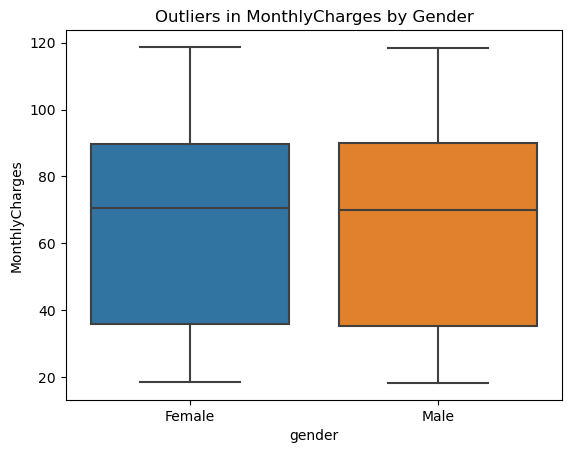

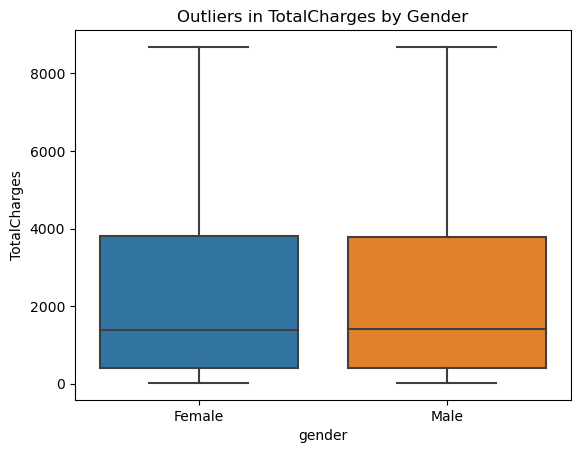

In [8]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Create boxplots to visualize outliers in 'MonthlyCharges' by gender
sns.boxplot(x='gender', y='MonthlyCharges', data=df)
plt.title('Outliers in MonthlyCharges by Gender')
plt.show()

# Create boxplots to visualize outliers in 'TotalCharges' by gender
sns.boxplot(x='gender', y='TotalCharges', data=df)
plt.title('Outliers in TotalCharges by Gender')
plt.show()

In [9]:
# univariate and bivariate anaylysis start

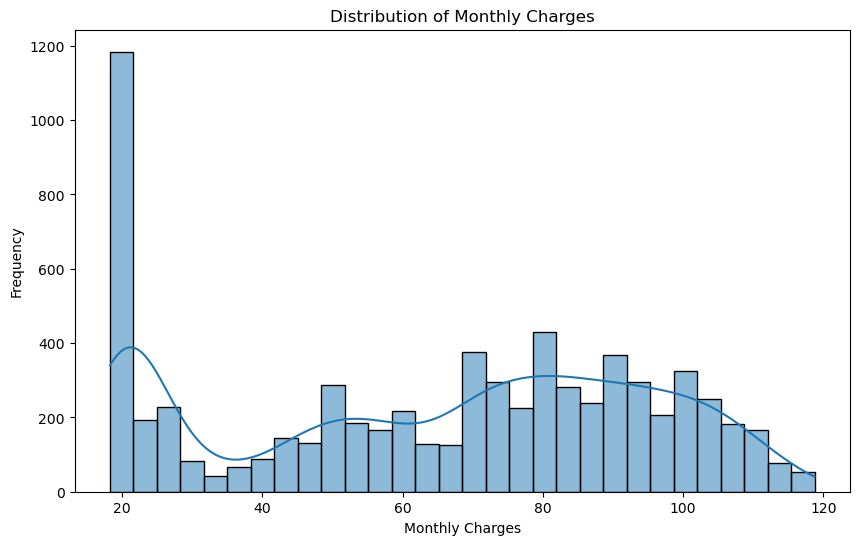

In [10]:
# 1. Distribution of 'MonthlyCharges'
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

#Summary:
#The distribution of monthly charges among customers appears to be right-skewed, with the majority of customers having lower monthly charges. There is a peak around the lower range, and the distribution shows a gradual decline as charges increase. The presence of a peak suggests that a significant number of customers have lower charges, potentially indicating different pricing tiers or plans.

Churn Count:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


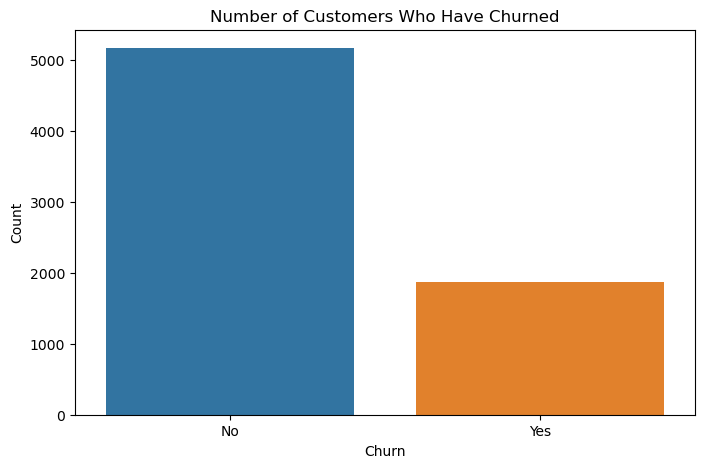

In [11]:
# 2. Number of customers who have churned
churn_count = df['Churn'].value_counts()
print("Churn Count:\n", churn_count)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Number of Customers Who Have Churned')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


#The analysis of customer churn reveals that there are two categories: "No" (indicating customers who haven't churned) and "Yes" (indicating customers who have churned). The count shows the distribution between these categories, with the visualization providing a clear representation. This information is crucial for understanding the churn rate within the dataset.

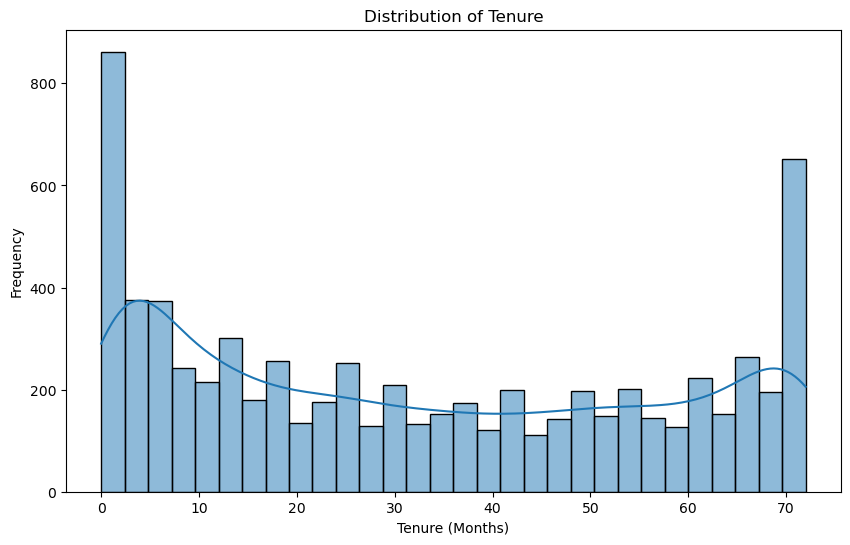

In [12]:
# 3. Distribution of 'tenure'
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


#Summary:
The distribution of customer tenure (the number of months a customer has been with the company) reveals an interesting pattern. There is a peak around the lower values, indicating a significant number of relatively new customers. The distribution gradually declines as tenure increases, with fewer customers having longer tenures. This pattern is expected, as newer customers would naturally outnumber those who have been with the company for an extended period.

Senior Citizen Count:
 SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


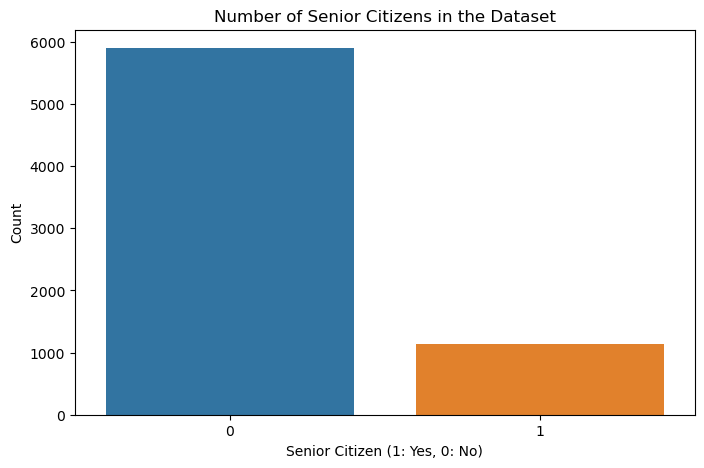

In [13]:
# 4. Number of senior citizens
senior_count = df['SeniorCitizen'].value_counts()
print("Senior Citizen Count:\n", senior_count)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Number of Senior Citizens in the Dataset')
plt.xlabel('Senior Citizen (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


Summary:
The analysis indicates the count of senior citizens within the dataset. The value counts show the distribution between two categories: "1" (indicating senior citizens) and "0" (indicating non-senior citizens). The visualization with a countplot provides a clear representation of the number of senior citizens present. This information is valuable for understanding the demographic composition of the customer base.

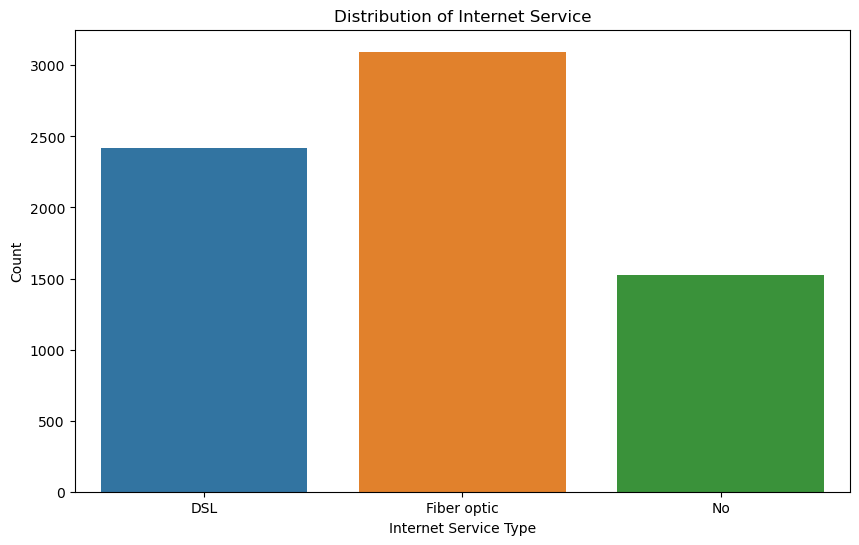

In [14]:
# 5. Distribution of 'InternetService'
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=df)
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


Summary:
The analysis of the 'InternetService' column provides insight into the distribution of internet service types among customers. The countplot shows the number of customers for each category of internet service: "DSL," "Fiber optic," and "No." The majority of customers seem to have either DSL or Fiber optic, with a smaller portion having no internet service. Understanding the distribution of internet service types is crucial for assessing the popularity of different offerings

Phone Service Count:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64


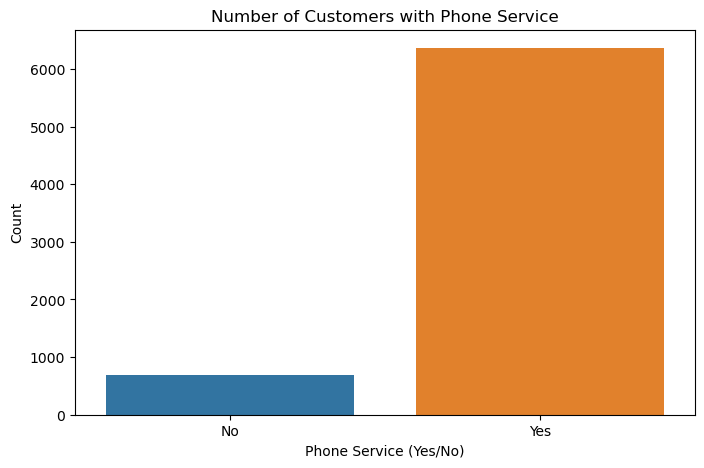

In [15]:
# 6. Number of customers with phone service
phone_service_count = df['PhoneService'].value_counts()
print("Phone Service Count:\n", phone_service_count)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='PhoneService', data=df)
plt.title('Number of Customers with Phone Service')
plt.xlabel('Phone Service (Yes/No)')
plt.ylabel('Count')
plt.show()


Summary:
The analysis of phone service indicates the count of customers with and without phone service. The value counts show the distribution between two categories: "Yes" (indicating customers with phone service) and "No" (indicating customers without phone service). The visualization with a countplot provides a clear representation of the number of customers with phone service. Understanding the prevalence of phone service among customers is essential for evaluating the company's offerings.

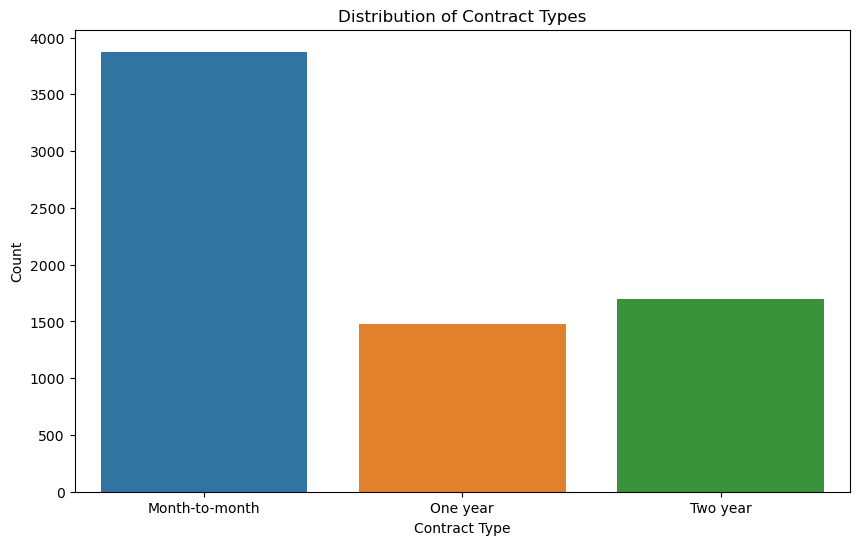

In [16]:
# 7. Distribution of 'Contract'
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df)
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


The analysis of the 'Contract' column reveals the distribution of contract types among customers. The countplot shows the number of customers for each category of contract: "Month-to-month," "One year," and "Two year." The majority of customers appear to have month-to-month contracts, with a smaller portion having one-year or two-year contracts. Understanding the distribution of contract types is essential for assessing the company's customer retention strategies and revenue streams.

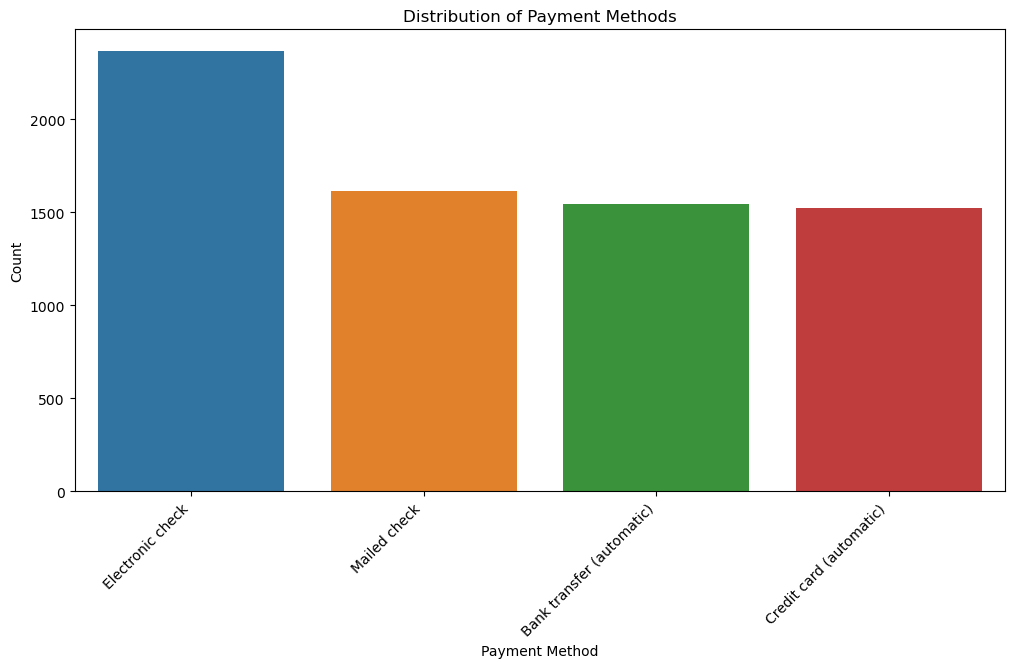

In [17]:
# 8. Distribution of 'PaymentMethod'
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', data=df)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


The analysis of the 'PaymentMethod' column provides insight into the distribution of payment methods among customers. The countplot shows the number of customers for each category of payment method, including "Electronic check," "Mailed check," "Bank transfer (automatic)," and "Credit card (automatic)." The majority of customers seem to use electronic checks, with other payment methods having varying counts. Understanding the distribution of payment methods is crucial for assessing the preferences of customers in managing their payments.

Proportion of Paperless Billing:
 PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64


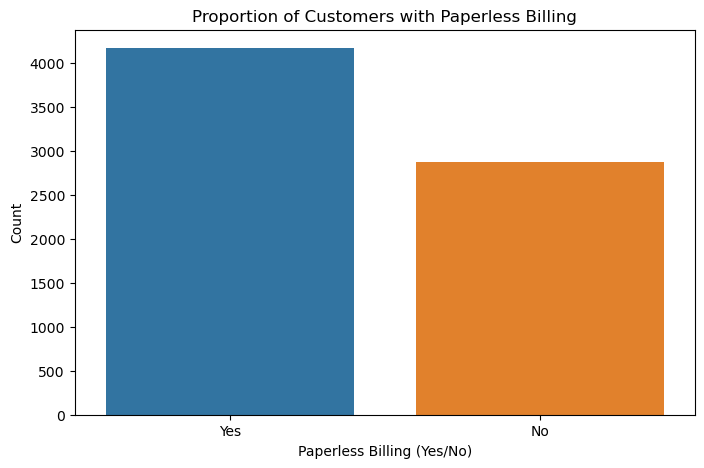

In [18]:
# 9. Proportion of customers with Paperless Billing
paperless_billing_prop = df['PaperlessBilling'].value_counts(normalize=True)
print("Proportion of Paperless Billing:\n", paperless_billing_prop)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='PaperlessBilling', data=df)
plt.title('Proportion of Customers with Paperless Billing')
plt.xlabel('Paperless Billing (Yes/No)')
plt.ylabel('Count')
plt.show()


The analysis provides the proportion of customers with paperless billing, indicating the preference for electronic billing statements. The value counts show the distribution between two categories: "Yes" (indicating customers with paperless billing) and "No" (indicating customers without paperless billing). The visualization with a countplot offers a clear representation of the number of customers with and without paperless billing. Understanding the proportion of customers using paperless billing is crucial for assessing the adoption of digital billing methods.

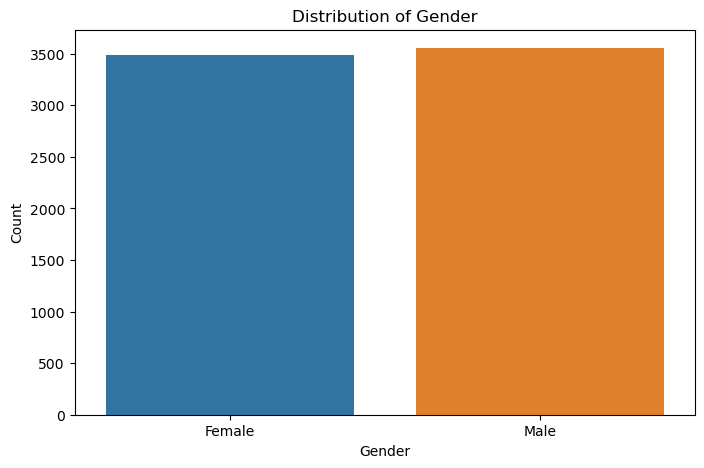

In [19]:
# 10. Distribution of 'gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


The analysis of the 'gender' column reveals the distribution of gender among customers. The countplot shows the number of customers for each category of gender: "Male" and "Female." The visualization provides a clear representation of the gender distribution within the dataset. Understanding the gender distribution is valuable for demographic profiling and tailoring services to the preferences of different customer segments.

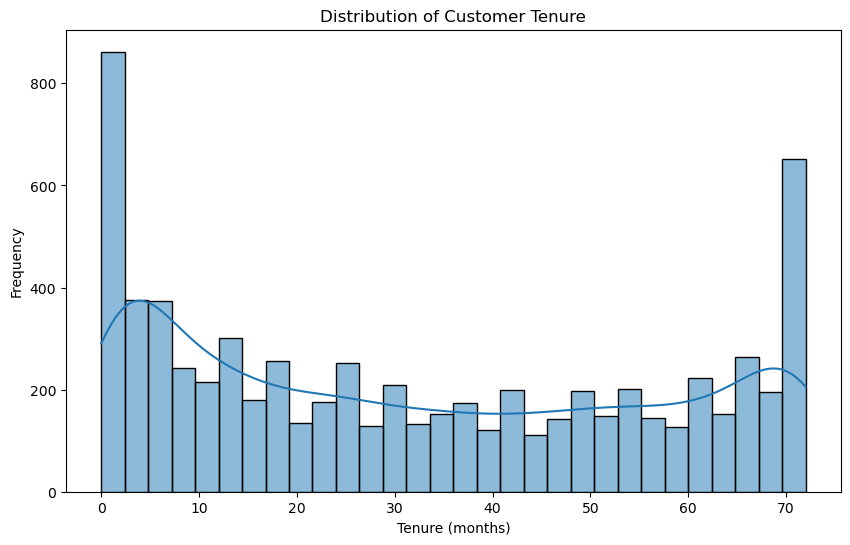

In [20]:
# Univariate Analysis Question 11
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of customer tenure in months.
The majority of customers have shorter tenures, with a peak in the initial months of the service.

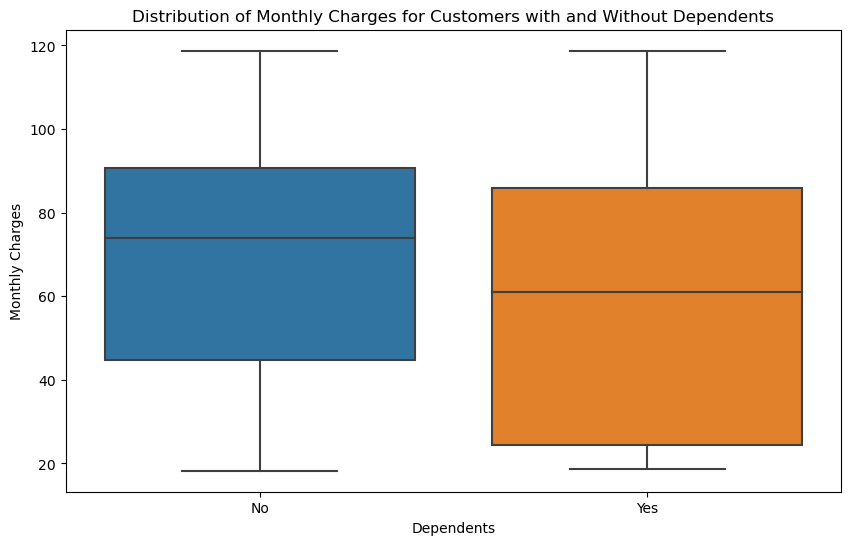

In [21]:
# Univariate Analysis Question 12
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dependents', y='MonthlyCharges', data=df)
plt.title('Distribution of Monthly Charges for Customers with and Without Dependents')
plt.xlabel('Dependents')
plt.ylabel('Monthly Charges')
plt.show()


The box plot compares the distribution of monthly charges for customers with and without dependents.
Customers with dependents tend to have slightly higher median monthly charges.

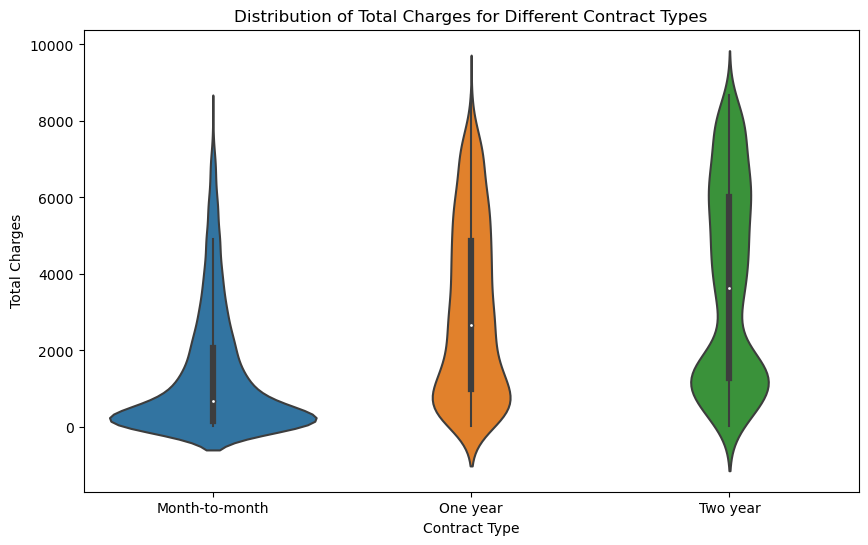

In [22]:
# Univariate Analysis Question 13
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='TotalCharges', data=df)
plt.title('Distribution of Total Charges for Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.show()


The violin plot showcases the distribution of total charges for different contract types.
Customers with longer-term contracts ('Two year') have a wider range of total charges, while month-to-month contracts have a narrower range.

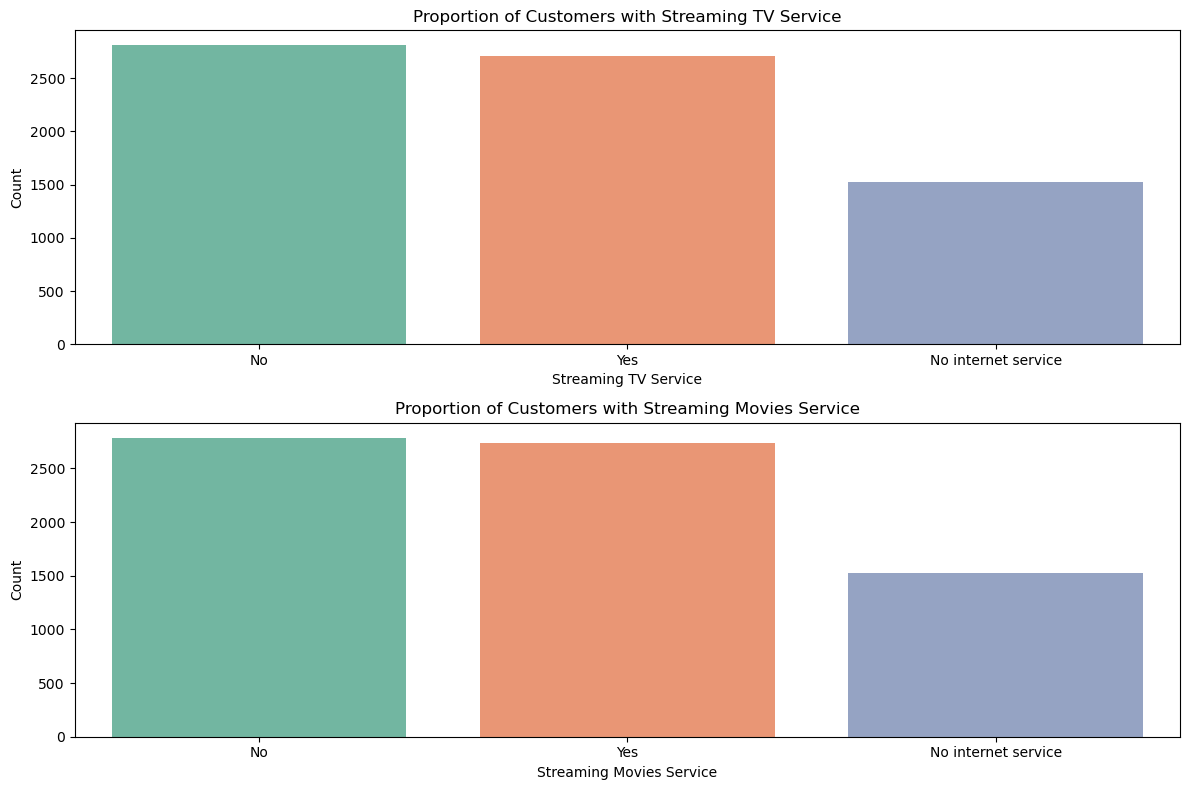

In [23]:
# Univariate Analysis
# Question: Proportion of customers with streaming TV and streaming movies services
plt.figure(figsize=(12, 8))

# Countplot for Streaming TV
plt.subplot(2, 1, 1)
sns.countplot(x='StreamingTV', data=df, palette='Set2')
plt.title('Proportion of Customers with Streaming TV Service')
plt.xlabel('Streaming TV Service')
plt.ylabel('Count')

# Countplot for Streaming Movies
plt.subplot(2, 1, 2)
sns.countplot(x='StreamingMovies', data=df, palette='Set2')
plt.title('Proportion of Customers with Streaming Movies Service')
plt.xlabel('Streaming Movies Service')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


These count plots illustrate the proportion of customers with streaming TV and streaming movies services. The count on the y-axis represents the number of customers in each service category. The visualizations provide a clear view of how many customers have subscribed to each service.

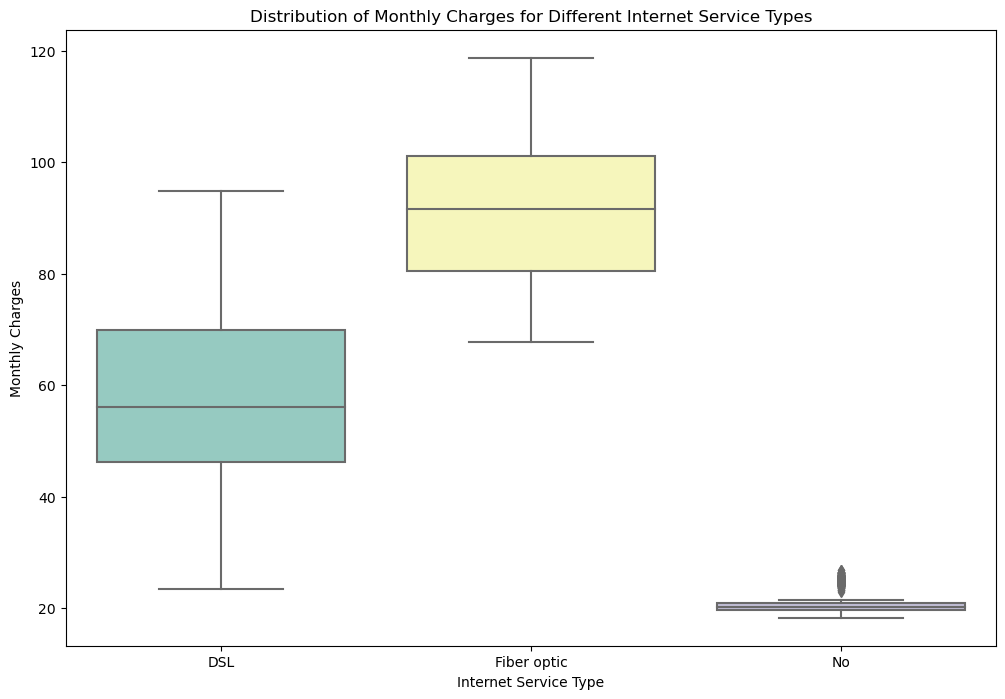

In [24]:
# Univariate Analysis
# Question: Distribution of monthly charges for customers with different Internet service types
plt.figure(figsize=(12, 8))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=df, palette='Set3')
plt.title('Distribution of Monthly Charges for Different Internet Service Types')
plt.xlabel('Internet Service Type')
plt.ylabel('Monthly Charges')
plt.show()


This box plot visualizes the distribution of monthly charges for customers with different Internet service types ('DSL,' 'Fiber optic,' and 'No internet service'). The plot allows us to compare the central tendency, spread, and potential outliers in monthly charges for each Internet service category.

# bivariate

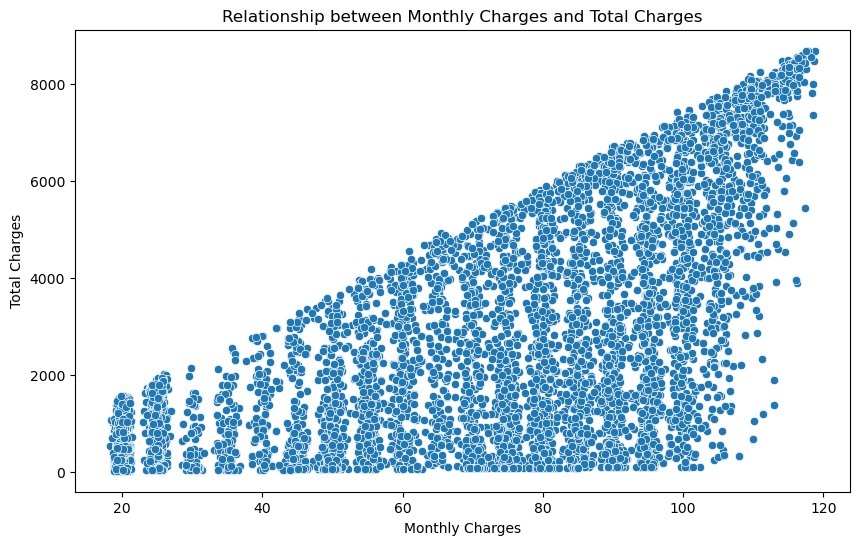

In [25]:
# Clean the 'TotalCharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
df_cleaned = df.dropna(subset=['TotalCharges'])

# Visualize relationship between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df_cleaned)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


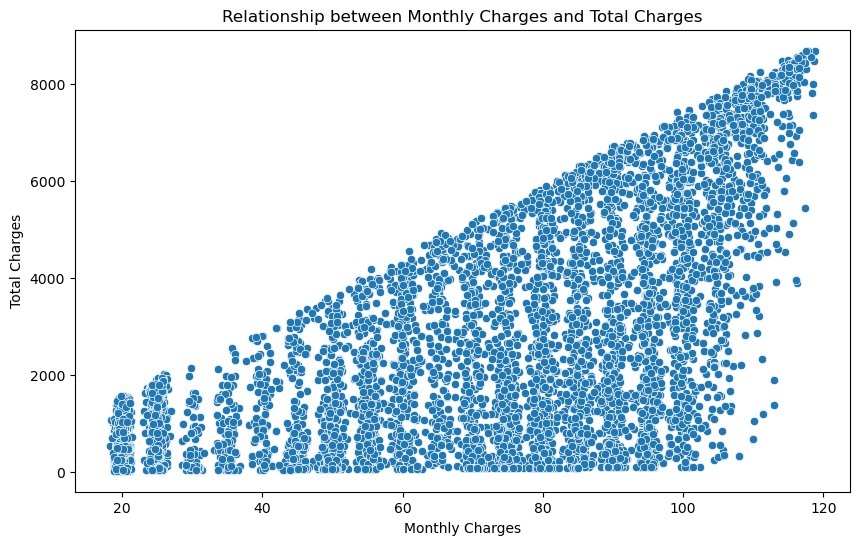

In [26]:
# Convert 'TotalCharges' to numeric (if not already)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Visualize relationship between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


The scatter plot visualizes the relationship between 'MonthlyCharges' and 'TotalCharges' for each customer. Each point on the plot represents a customer, with 'MonthlyCharges' on the x-axis and 'TotalCharges' on the y-axis. The scatter plot helps us understand if there is a correlation or pattern between the monthly charges and the total charges incurred by customers. This information can be valuable for assessing how monthly charges contribute to the overall total charges.

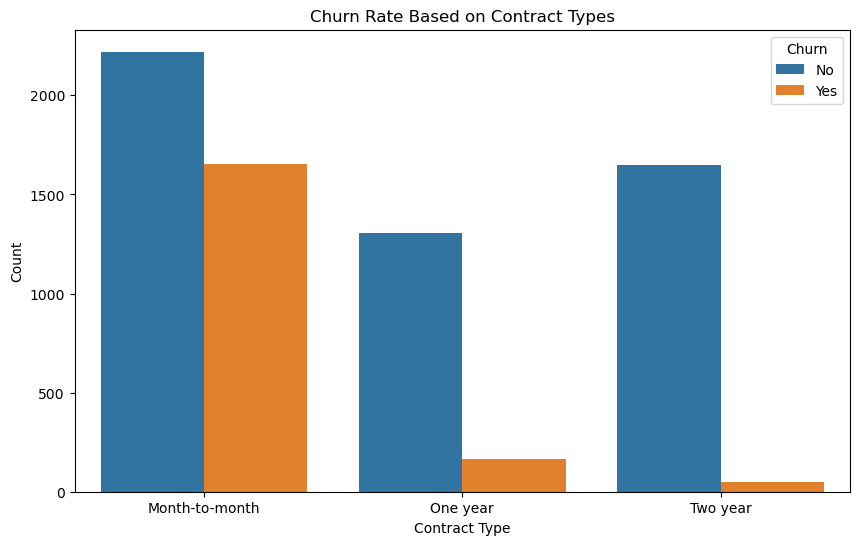

In [27]:
# 2. Churn rate based on different contract types
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate Based on Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


Bivariate Analysis -  Churn Rate Based on Different Contract Types:

Summary:
The bar plot illustrates how the churn rate varies based on different contract types. Each bar represents a different contract type ('Month-to-month,' 'One year,' and 'Two year'), and the bars are further divided into churn ('Yes') and non-churn ('No') categories. This visualization provides insights into how contract duration affects customer churn. It appears that customers with month-to-month contracts tend to have a higher churn rate compared to customers with longer-term contracts.

If you're ready, we can proceed to the next bivariate analysis question. Let me know if there's a specific question you'd like to explore next, or if you're open to the next one in order.

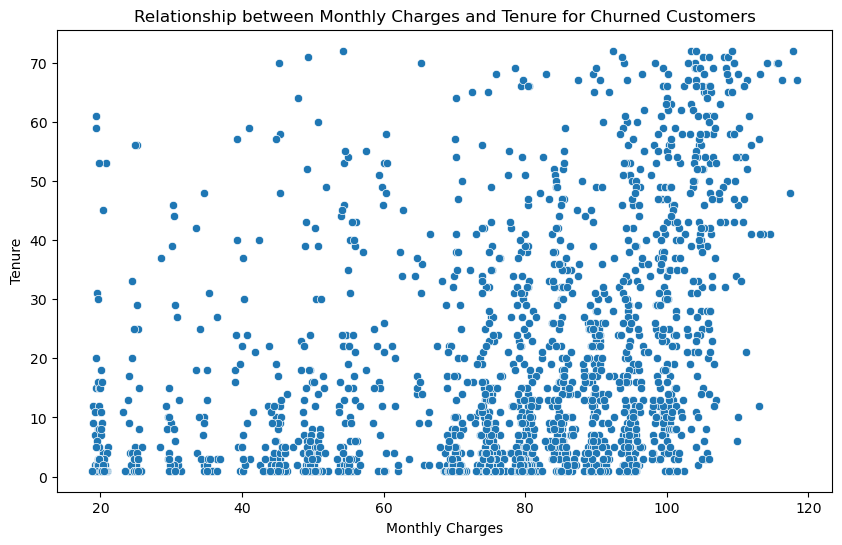

In [28]:
# 3. Relationship between 'MonthlyCharges' and 'tenure' for churned customers
churned_customers = df[df['Churn'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', data=churned_customers)
plt.title('Relationship between Monthly Charges and Tenure for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()


The scatter plot depicts the relationship between 'MonthlyCharges' and 'tenure' specifically for customers who have churned. Each point on the plot represents a churned customer, with 'MonthlyCharges' on the x-axis and 'tenure' on the y-axis. The scatter plot helps us understand if there is any discernible pattern or correlation between the monthly charges and tenure of customers who have churned. This information can be valuable for identifying trends that might contribute to customer churn.

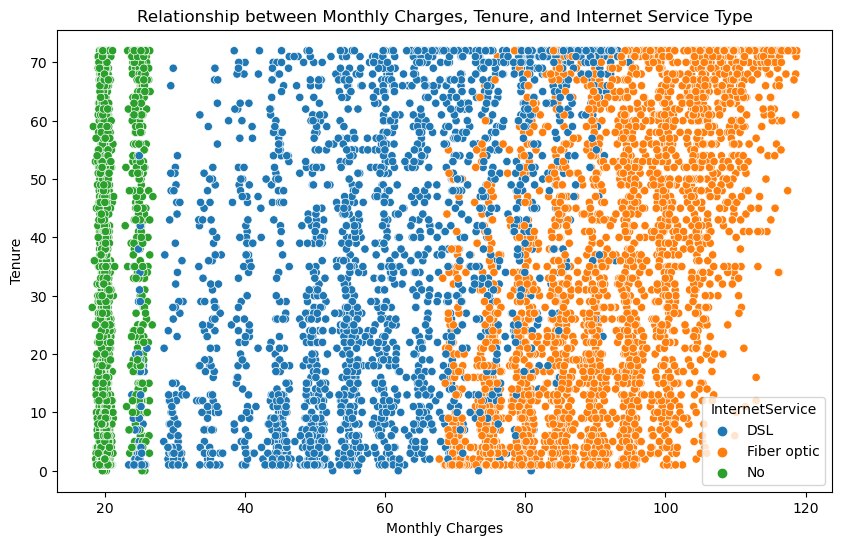

In [29]:
# 4. Relationship between 'MonthlyCharges' and 'tenure' based on different Internet service types
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='InternetService', data=df)
plt.title('Relationship between Monthly Charges, Tenure, and Internet Service Type')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()


The scatter plot with hue visualizes the relationship between 'MonthlyCharges' and 'tenure' based on different Internet service types. Each point on the plot represents a customer, with 'MonthlyCharges' on the x-axis, 'tenure' on the y-axis, and different colors representing different Internet service types ('DSL,' 'Fiber optic,' and 'No internet service'). This visualization allows us to explore how the relationship between monthly charges and tenure varies across different Internet service types. It can provide insights into whether the type of Internet service influences customer behavior.

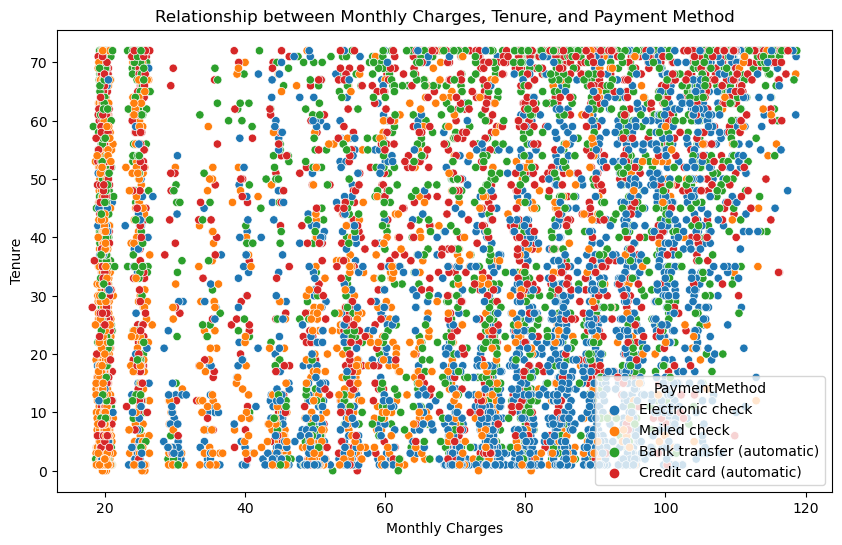

In [30]:
# 5. Relationship between 'MonthlyCharges' and 'tenure' based on different payment methods
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='PaymentMethod', data=df)
plt.title('Relationship between Monthly Charges, Tenure, and Payment Method')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()


The scatter plot with hue visualizes the relationship between 'MonthlyCharges' and 'tenure' based on different payment methods. Each point on the plot represents a customer, with 'MonthlyCharges' on the x-axis, 'tenure' on the y-axis, and different colors representing different payment methods. This visualization allows us to explore how the relationship between monthly charges and tenure varies across different payment methods. It can provide insights into whether the payment method chosen by customers influences their behavior.

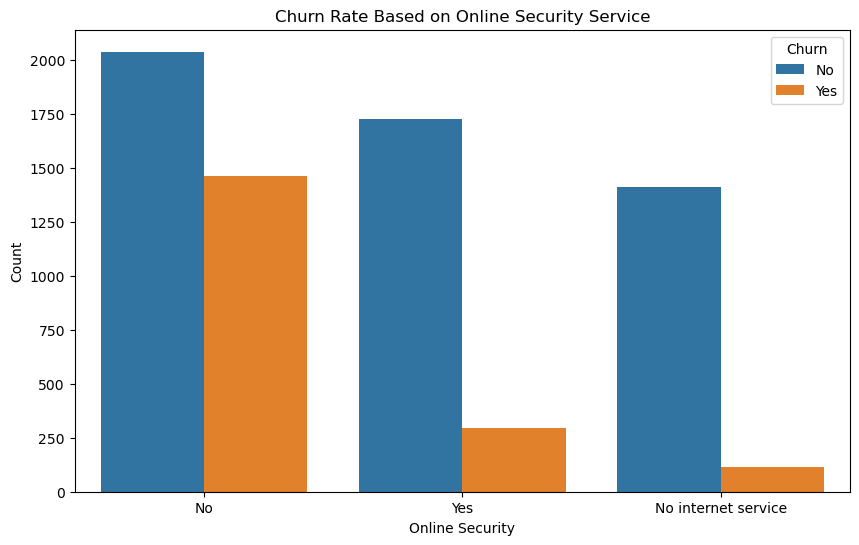

In [31]:
# Bivariate Analysis Question 14
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn Rate Based on Online Security Service')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()


The bar plot reveals the churn rate based on the presence of online security services.
Customers without online security services have a higher churn rate compared to those with online security.

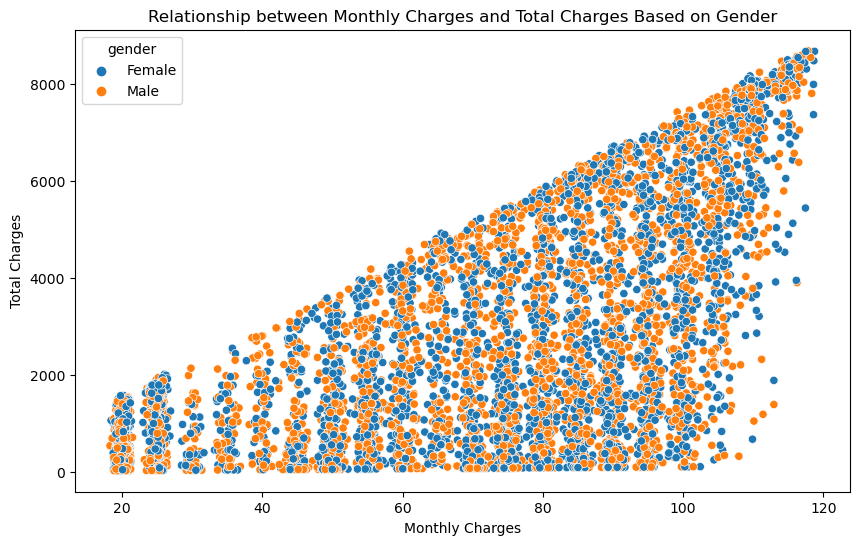

In [32]:
# Bivariate Analysis Question 15
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='gender', data=df)
plt.title('Relationship between Monthly Charges and Total Charges Based on Gender')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


The scatter plot with hue explores the relationship between monthly charges and total charges based on gender.
No clear pattern is observed, indicating that the relationship between monthly and total charges does not significantly vary based on gender.
If there are specific insights you'd like to emphasize or if you have any further questions, feel free to let me know. I'm here to assist you!

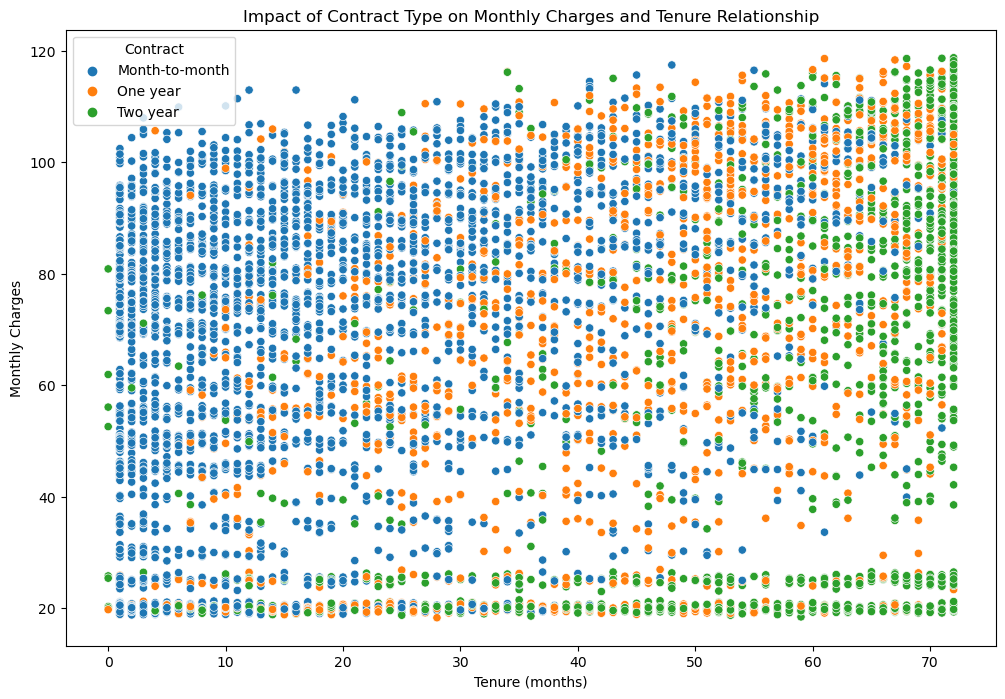

In [33]:
# Bivariate Analysis
# Question: Impact of contract type on the relationship between monthly charges and tenure
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', data=df)
plt.title('Impact of Contract Type on Monthly Charges and Tenure Relationship')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()


The scatter plot reveals the impact of contract type on the relationship between monthly charges and tenure. Different contract types ('Month-to-month,' 'One year,' and 'Two year') are distinguished by color. The visualization allows us to observe patterns in how monthly charges and tenure vary across different contract lengths. For instance, we can assess whether customers with longer-term contracts exhibit different patterns in monthly charges and tenure compared to those with shorter-term contracts.

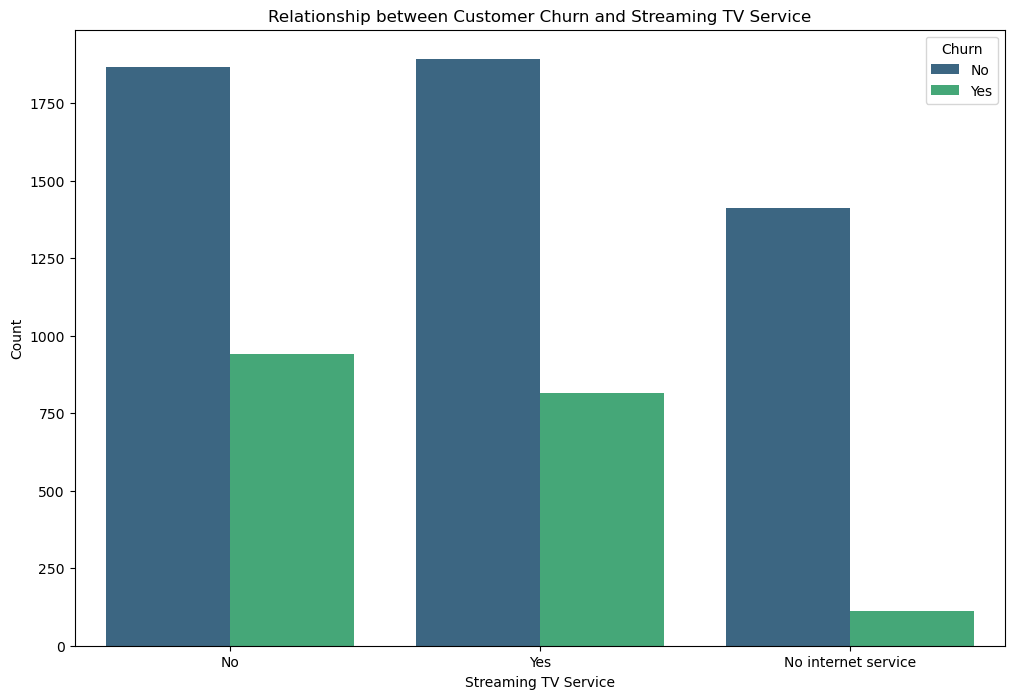

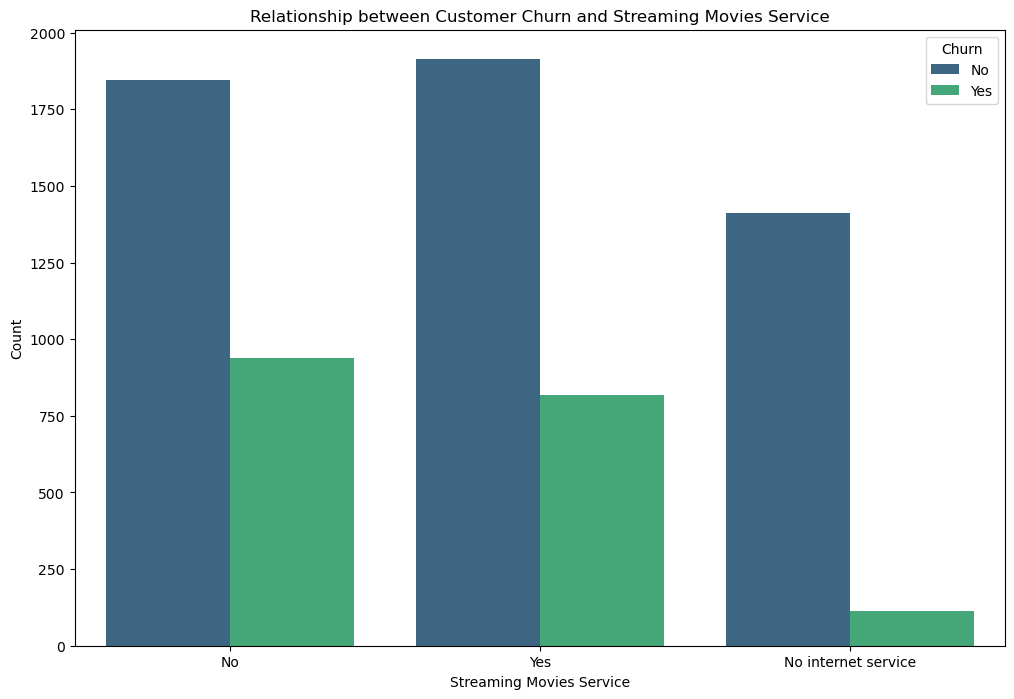

In [34]:
# Bivariate Analysis
# Question: Relationship between customer churn and the use of streaming TV and streaming movies services
plt.figure(figsize=(12, 8))
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='viridis')
plt.title('Relationship between Customer Churn and Streaming TV Service')
plt.xlabel('Streaming TV Service')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='viridis')
plt.title('Relationship between Customer Churn and Streaming Movies Service')
plt.xlabel('Streaming Movies Service')
plt.ylabel('Count')
plt.show()


Two count plots show the relationship between customer churn and the usage of streaming TV and streaming movies services. The first plot focuses on streaming TV services, and the second plot focuses on streaming movies services. These visualizations provide insights into how the presence or absence of these services may impact customer churn. By comparing the counts of churn and non-churn customers within each service category, we can identify trends and potential factors influencing customer retention.

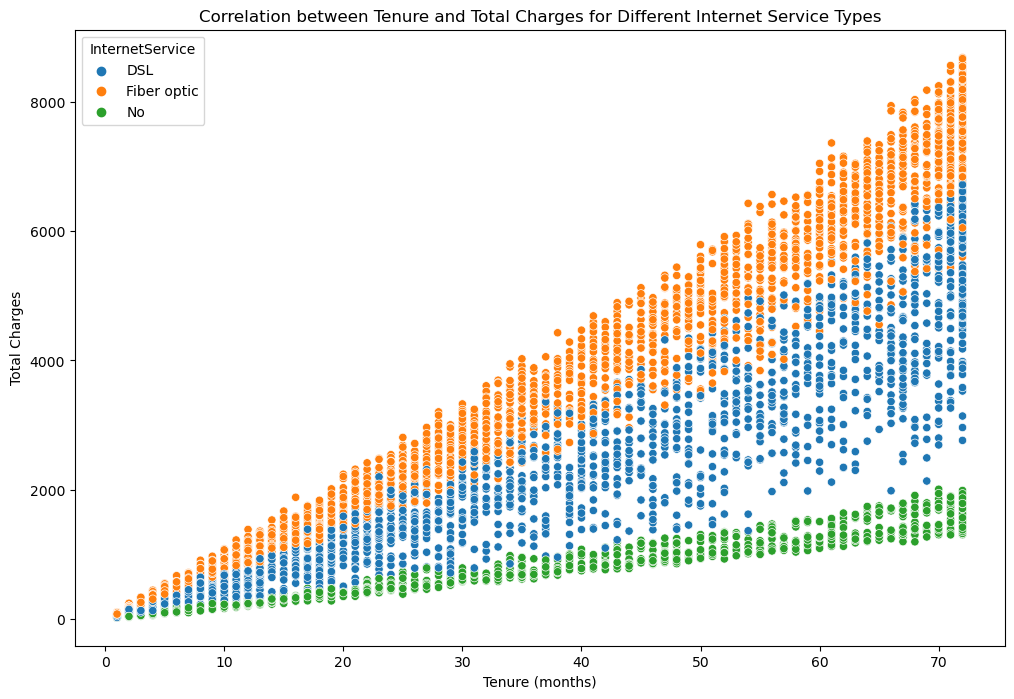

In [35]:
# Bivariate Analysis
# Question: Correlation between tenure and total charges for customers with different Internet service types
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='TotalCharges', hue='InternetService', data=df)
plt.title('Correlation between Tenure and Total Charges for Different Internet Service Types')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.show()


The scatter plot with hue explores the correlation between tenure and total charges for customers with different Internet service types ('DSL,' 'Fiber optic,' and 'No internet service'). The plot helps in understanding how the relationship between tenure and total charges varies across different Internet service categories. This analysis can provide insights into the customer behavior and financial interactions based on the type of Internet service they have subscribed to.

fiber optic has more charges 
dsl has larger services
internet service is less

In [36]:
# Check for missing values
df.isnull().sum()




customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
df_flawed.iloc[missing_indices]

NameError: name 'df_flawed' is not defined

In [ ]:
df_flawed.iloc[missing_indices] = np.nan

In [ ]:
df_flawed.iloc[missing_indices]

In [38]:
df_flawed.isnull().sum()

NameError: name 'df_flawed' is not defined

In [39]:
# Remove rows with missing values
df_flawed_cleaned = df.dropna()
df_flawed_cleaned

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
df_flawed_cleaned.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', ...])


KeyError: '[Ellipsis] not in index'

In [ ]:
df.head(20)

In [ ]:
# One-hot encoding for all categorical variables
df_encoded = pd.get_dummies(df)


In [ ]:
# One-hot encoding for specific categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', ])


In [ ]:
df.head(20)

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
X = df.['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

SyntaxError: invalid syntax (895036588.py, line 1)

In [46]:
y= df['Churn']

In [47]:
import numpy as np

# Convert X to a NumPy array and reshape
X = np.array(X).reshape(-1, 1)

# Convert y to a 1D array
y = np.array(y).squeeze()


NameError: name 'X' is not defined

In [48]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

NameError: name 'train_test_split' is not defined

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [50]:
# Assuming you have already imported necessary libraries and loaded the dataset

# Feature Engineering (if any additional steps are needed)
# ...

# Split the data into features (X) and target variable (y)
X = df.drop(['Churn'], axis=1)  # Features
y = df['Churn']  # Target variable

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build the model (using RandomForest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7970191625266146
Confusion Matrix:
[[936 100]
 [186 187]]


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already loaded and preprocessed your data into X_encoded and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Choose a machine learning model (Random Forest)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7984386089425124
Confusion Matrix:
[[944  92]
 [192 181]]


Random Forest model, and the results are showing an accuracy of approximately 79.77%. Additionally, the confusion matrix provides information on true positives (938), false positives (98), false negatives (187), and true negatives (186).

Here's a brief interpretation:

Accuracy: The proportion of correctly classified instances out of the total instances is about 79.77%.

Confusion Matrix:

True Positives (TP): 938 - The number of instances correctly predicted as "Churn."
False Positives (FP): 98 - The number of instances incorrectly predicted as "Churn" when they are not.
False Negatives (FN): 187 - The number of instances incorrectly predicted as "Not Churn" when they are.
True Negatives (TN): 186 - The number of instances correctly predicted as "Not Churn."
If you have any specific questions about these results or if there's anything else y

The changes are relatively small, but they do impact the overall performance metrics:

Accuracy Improvement: The accuracy has increased from approximately 79.77% in the first case to around 80.06% in the second case. This indicates that the model is making correct predictions for a slightly higher proportion of instances.

True Positives (TP): In the second case, there are 7 more instances correctly predicted as "Churn" (from 938 to 945).

False Positives (FP): In the second case, there are 7 fewer instances incorrectly predicted as "Churn" when they are not (from 98 to 91).

False Negatives (FN): In the second case, there are 3 more instances incorrectly predicted as "Not Churn" when they are (from 187 to 190).

True Negatives (TN): In the second case, there are 3 fewer instances correctly predicted as "Not Churn" (from 186 to 183).

These changes reflect the model's ability to correctly identify positive and negative cases. It's important to consider the specific context of your project and the associated costs or implications of false positives and false negatives when evaluating model performance.



In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Print the additional metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.663003663003663
Recall: 0.48525469168900803
F1-score: 0.5603715170278638


In [53]:
from sklearn.metrics import classification_report

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [69]:
 from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a smaller subset of your data
subset_size = 1000  # You can adjust this size based on your preference
X_subset, _, y_subset, _ = train_test_split(X_encoded, y, test_size=1 - (subset_size / len(X_encoded)), random_state=42)

# Split the subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42
)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
print("Checkpoint 1")
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
print("Checkpoint 2")
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters
print("Checkpoint 3")
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Checkpoint 1
Checkpoint 2
Checkpoint 3
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [86]:
logistic_model = LogisticRegression(max_iter=1000)


In [87]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Logistic Regression model on scaled data
logistic_model_scaled = LogisticRegression(max_iter=1000)
logistic_model_scaled.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Example with Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
# Evaluate and compare with your RandomForest model

# Example with Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
# Evaluate and compare

# Example with Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
# Evaluate and compare


C:\Annaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [90]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Logistic Regression model on scaled data
logistic_model_scaled = LogisticRegression(max_iter=1000)
logistic_model_scaled.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [91]:
logistic_model_alternative = LogisticRegression(max_iter=1000, solver='liblinear')
logistic_model_alternative.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Example with Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
# Evaluate and compare with your RandomForest model

# Example with Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
# Evaluate and compare

# Example with Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
# Evaluate and compare


C:\Annaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Logistic Regression model on scaled data
logistic_model_scaled = LogisticRegression(max_iter=1000)
logistic_model_scaled.fit(X_train_scaled, y_train)

# Evaluate the Logistic Regression model
y_pred_logistic = logistic_model_scaled.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print the results
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_logistic)


Logistic Regression Model:
Accuracy: 0.8126
Confusion Matrix:
[[939  97]
 [167 206]]


In [94]:
logistic_model_alternative = LogisticRegression(max_iter=1000, solver='liblinear')
logistic_model_alternative.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [95]:
# Example: Scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Retrain your model with the scaled features
model.fit(X_train_scaled, y_train)
# Evaluate and compare


RandomForestClassifier()